# Customer Churn Analysis

# Problem Statement:
Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

Downlaod Files:
    
    
https://github.com/dsrscientist/DSData/blob/master/Telecom_customer_churn.csv

In [1]:
#Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Data Importing

df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Exploratory Data Analysis

In [3]:
#checking shape of Data.
df.shape

(7043, 21)

In [4]:
#Checking Data Types.
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
#Getting details from all features.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

No Missing values are present.



In [7]:
#Droping column as we are getting it is not related with prediction.
df.drop(['customerID'],axis=1,inplace=True)

# Statistical Summary

In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Here we are analysing the all numerical features statistically and as we are seeing here all numerical features describing with count,mean,std,minm,25%,50%, 75% and max.



# Data Visualization

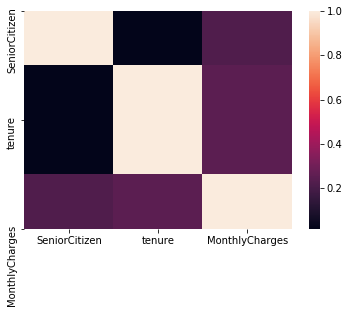

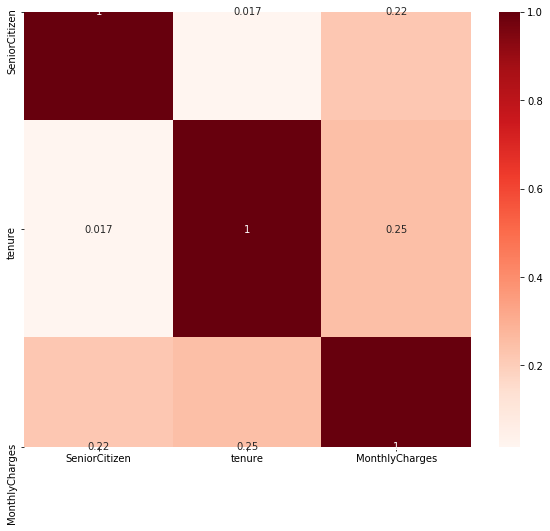

In [9]:
dfcor=df.corr()
dfcor
sns.heatmap(dfcor)
plt.figure(figsize=(10,8))
sns.heatmap(dfcor,cmap='Reds',annot=True)

# Univariate Analysis

Text(0.5, 1.0, 'gender')

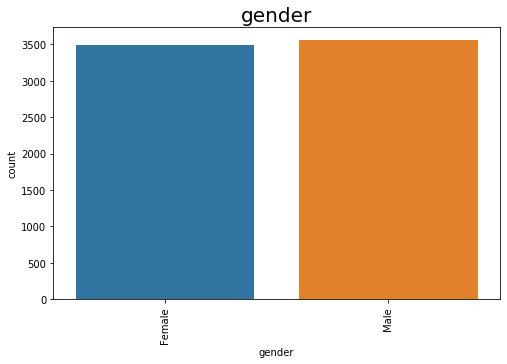

In [10]:
fig_size = (8,5)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=df, x="gender")
plt.xticks(rotation=90)
plt.title("gender", fontsize = 20)

Here we are ploting Gender column and as we getting male and female both are equal.



Text(0.5, 1.0, 'SeniorCitizen')

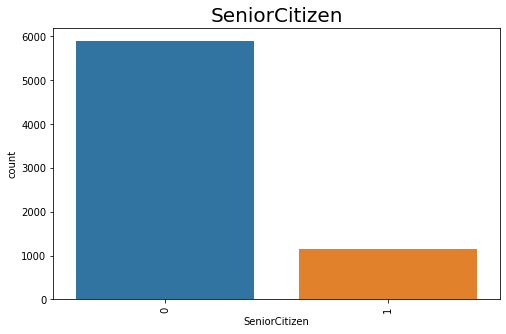

In [11]:
fig_size = (8,5)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=df, x="SeniorCitizen")
plt.xticks(rotation=90)
plt.title("SeniorCitizen", fontsize = 20)

Here 0 is very high then 1



Text(0.5, 1.0, 'Partner')

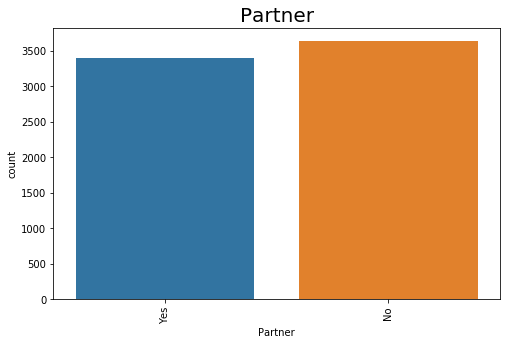

In [12]:
fig_size = (8,5)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=df, x="Partner")
plt.xticks(rotation=90)
plt.title("Partner", fontsize = 20)

Both are almost equal Yes and No.



Text(0.5, 1.0, 'Dependents')

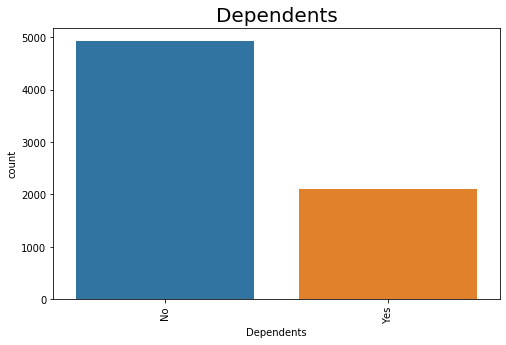

In [13]:
fig_size = (8,5)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=df, x="Dependents")
plt.xticks(rotation=90)
plt.title("Dependents", fontsize = 20)

the maximum have no dependents.



Text(0.5, 1.0, 'tenure')

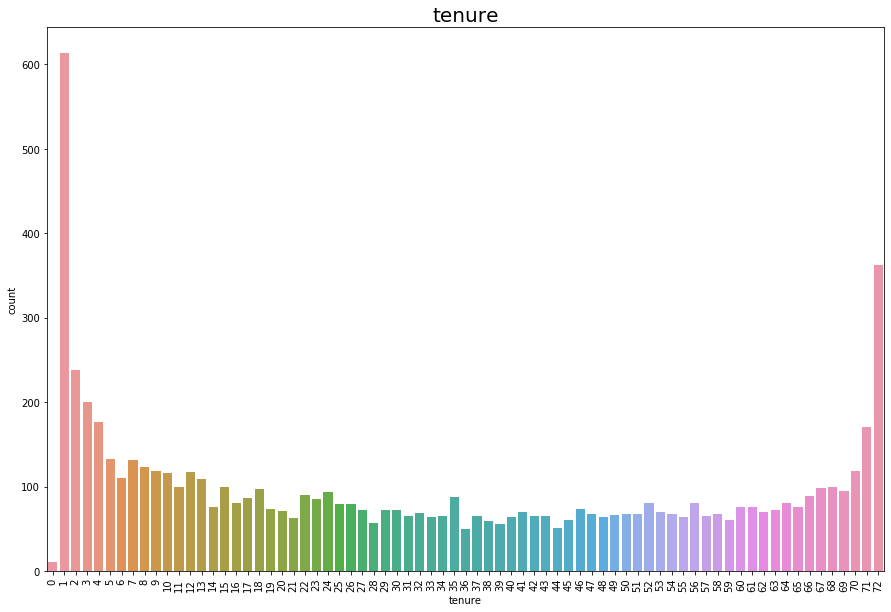

In [14]:
fig_size = (15,10)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=df, x="tenure")
plt.xticks(rotation=90)
plt.title("tenure", fontsize = 20)

The 1 and 2 no. are highest counts



Text(0.5, 1.0, 'PhoneService')

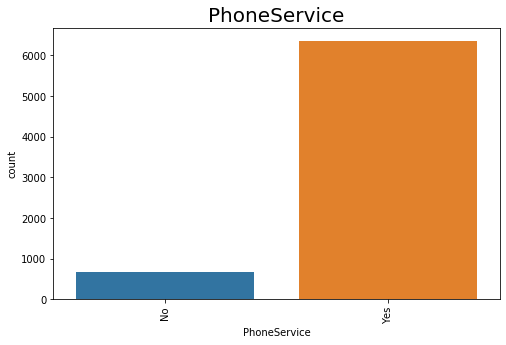

In [15]:
fig_size = (8,5)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=df, x="PhoneService")
plt.xticks(rotation=90)
plt.title("PhoneService", fontsize = 20)

very few who's have no phone service.



Text(0.5, 1.0, 'MultipleLines')

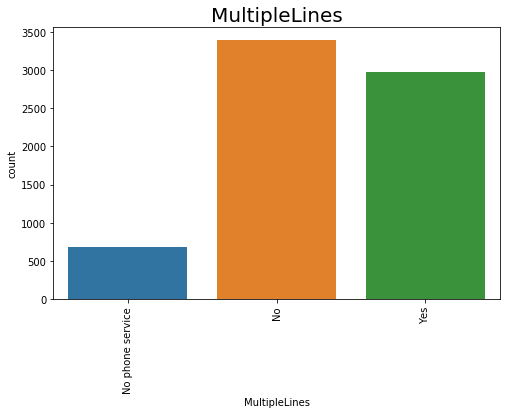

In [16]:
fig_size = (8,5)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=df, x="MultipleLines")
plt.xticks(rotation=90)
plt.title("MultipleLines", fontsize = 20)

If we check according to Multiplelines, Maximum have No multiplelines.



Text(0.5, 1.0, 'InternetService')

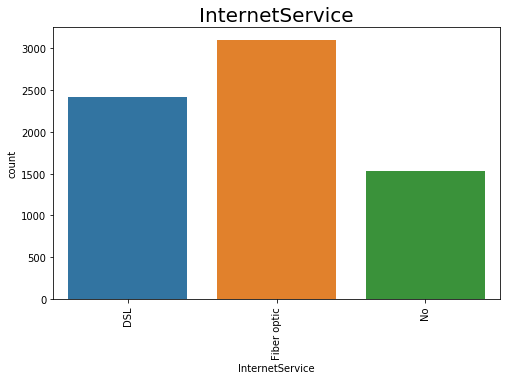

In [17]:
fig_size = (8,5)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=df, x="InternetService")
plt.xticks(rotation=90)
plt.title("InternetService", fontsize = 20)

Maximum customer have Fiber optical



Text(0.5, 1.0, 'TechSupport')

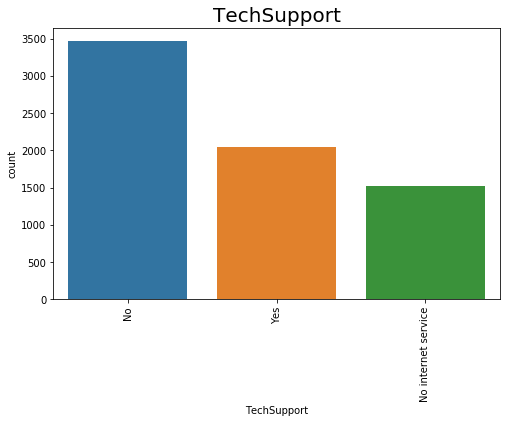

In [18]:
fig_size = (8,5)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=df, x="TechSupport")
plt.xticks(rotation=90)
plt.title("TechSupport", fontsize = 20)

Maximum customers have No Tech Support.



Text(0.5, 1.0, 'StreamingTV')

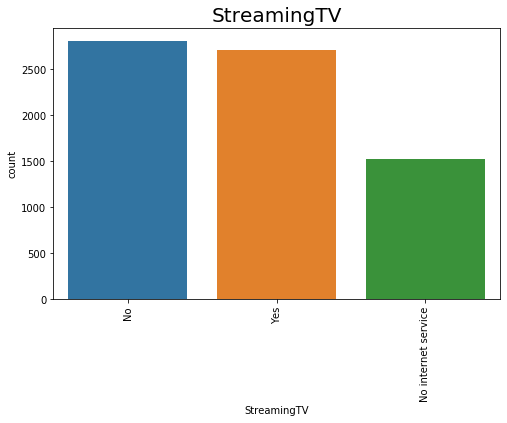

In [19]:
fig_size = (8,5)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=df, x="StreamingTV")
plt.xticks(rotation=90)
plt.title("StreamingTV", fontsize = 20)

According to Streaming TV, both are equal who's streaming TV or not streaming TV.



Text(0.5, 1.0, 'StreamingMovies')

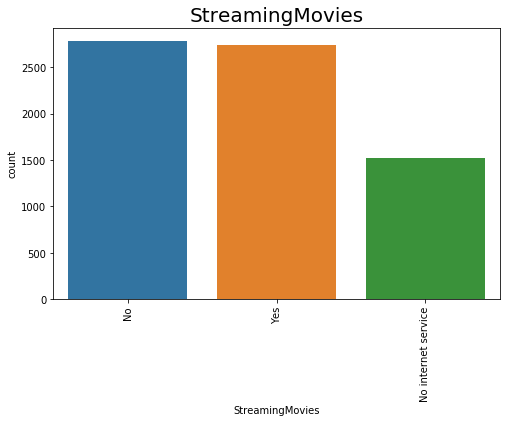

In [20]:
fig_size = (8,5)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=df, x="StreamingMovies")
plt.xticks(rotation=90)
plt.title("StreamingMovies", fontsize = 20)

According to Streaming Movies, both are equal who's streaming Movies or not streaming Movies. Few customers have no internet servie.



Text(0.5, 1.0, 'Contract')

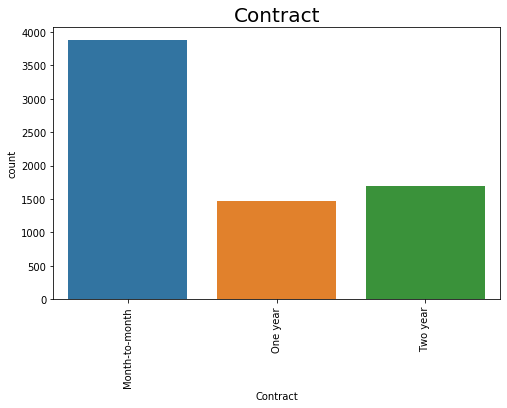

In [21]:
fig_size = (8,5)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=df, x="Contract")
plt.xticks(rotation=90)
plt.title("Contract", fontsize = 20)

The maximum customers are month to month contract cusotmers.



Text(0.5, 1.0, 'PaymentMethod')

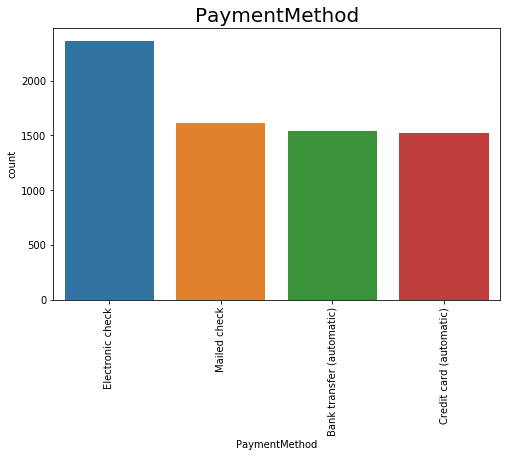

In [22]:
fig_size = (8,5)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=df, x="PaymentMethod")
plt.xticks(rotation=90)
plt.title("PaymentMethod", fontsize = 20)

The maximum customers paymentmethod are Electronic check.



Text(0.5, 1.0, 'Churn')

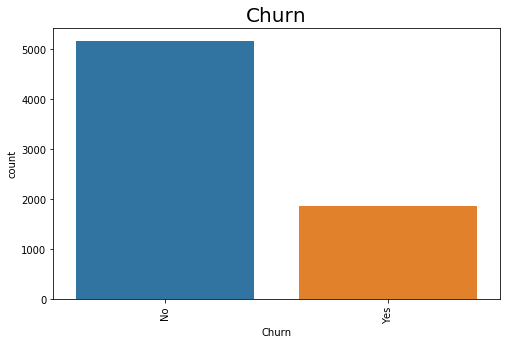

In [23]:
fig_size = (8,5)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=df, x="Churn")
plt.xticks(rotation=90)
plt.title("Churn", fontsize = 20)

According to target variable maximum customers no churn.



# Bivariate Analysis

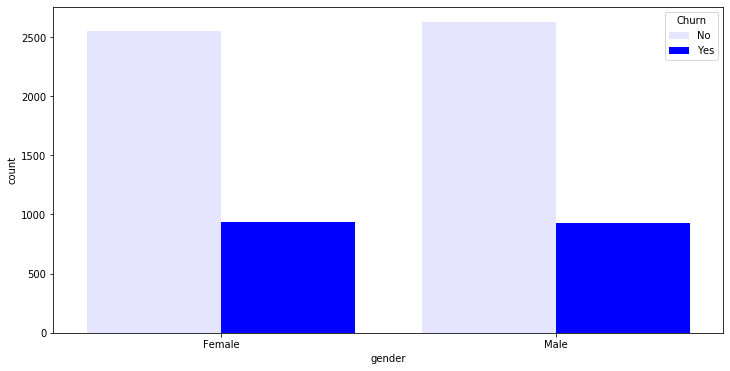

In [24]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'gender' , hue = 'Churn' , data = df , dodge = True , color = 'Blue' , saturation = 1)

There is negligible difference in customer percentage/ count who chnaged the service provider. Both genders behaved in similar fashion when it comes to migrating to another service provider/firm.



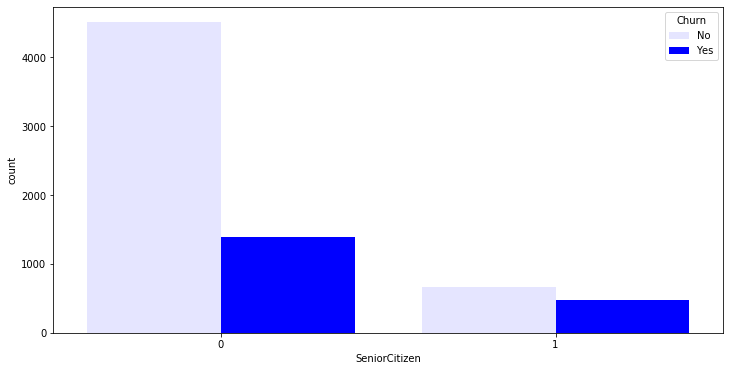

In [25]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'SeniorCitizen' , hue = 'Churn' , data = df , dodge = True , color = 'Blue' , saturation = 1)

It can be observed that the fraction of senior citizen is very less and Most of the senior citizens churn.



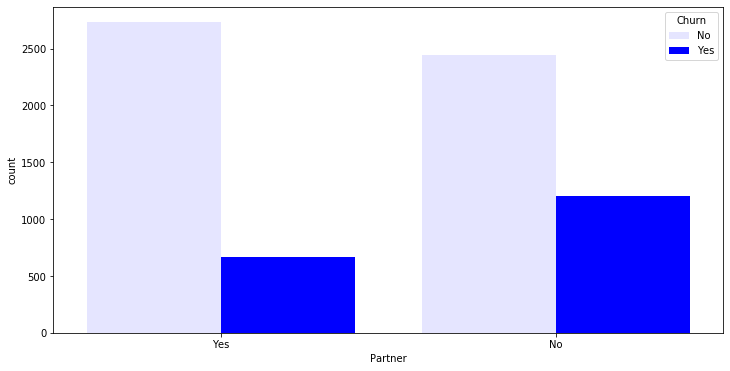

In [26]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'Partner' , hue = 'Churn' , data = df , dodge = True , color = 'Blue' , saturation = 1)

Customers that doesn't have partners are more likely to churn.



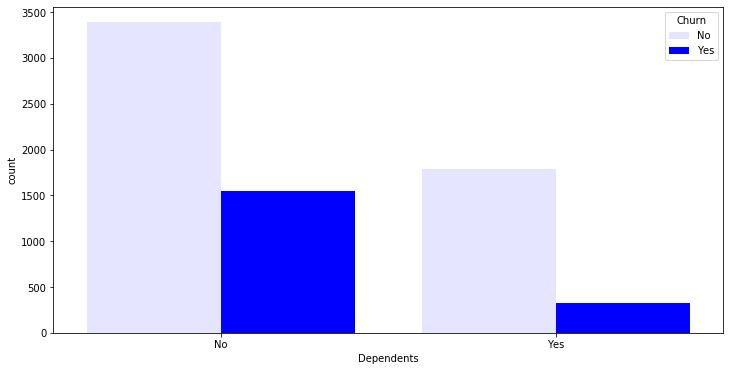

In [27]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'Dependents' , hue = 'Churn' , data = df , dodge = True , color = 'Blue' , saturation = 1)

according to dependent NO is higher then Yes churn.



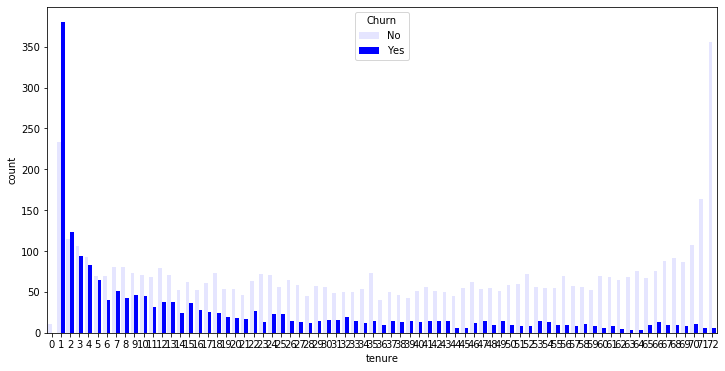

In [28]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'tenure' , hue = 'Churn' , data = df , dodge = True , color = 'Blue' , saturation = 1)

New customers are more likely to churn



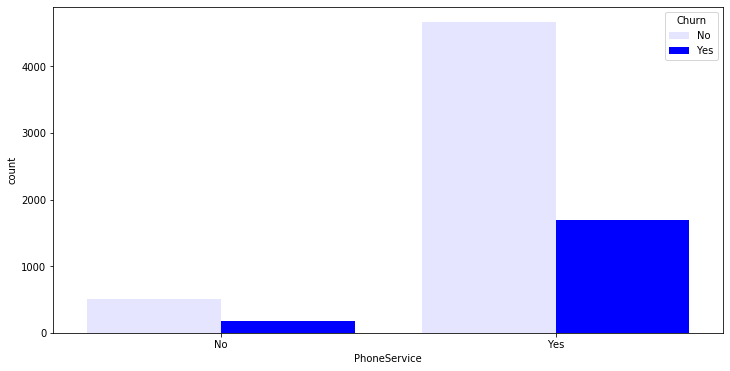

In [29]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'PhoneService' , hue = 'Churn' , data = df , dodge = True , color = 'Blue' , saturation = 1)

Very small fraction of customers don't have a phone service and out of that, 1/3rd Customers are more likely to churn.



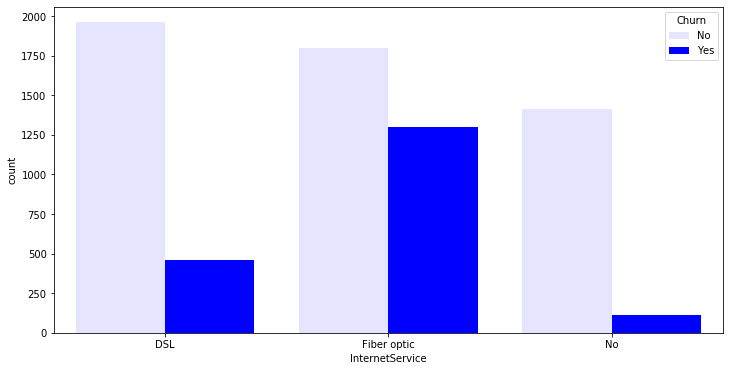

In [30]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'InternetService' , hue = 'Churn' , data = df , dodge = True , color = 'Blue' , saturation = 1)

Fiber optic has highest churn others are less.



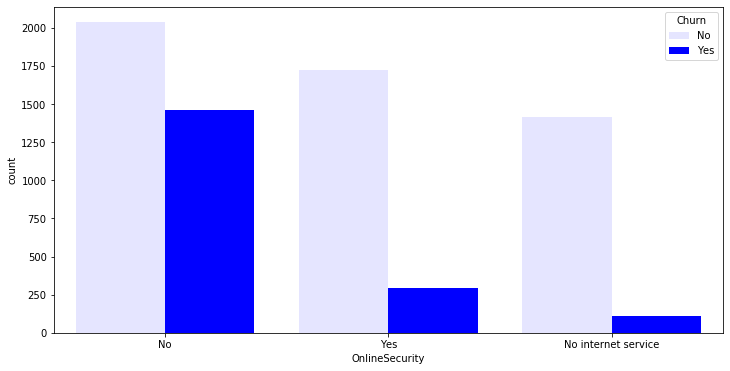

In [31]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'OnlineSecurity' , hue = 'Churn' , data = df , dodge = True , color = 'Blue' , saturation = 1)

Most customers churn in the absence of online security,



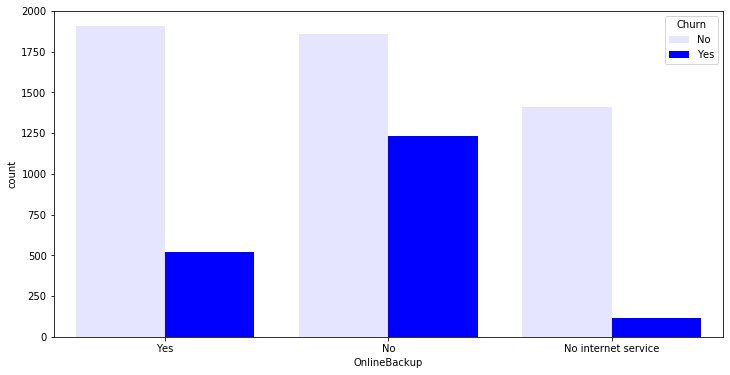

In [32]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'OnlineBackup' , hue = 'Churn' , data = df , dodge = True , color = 'Blue' , saturation = 1)

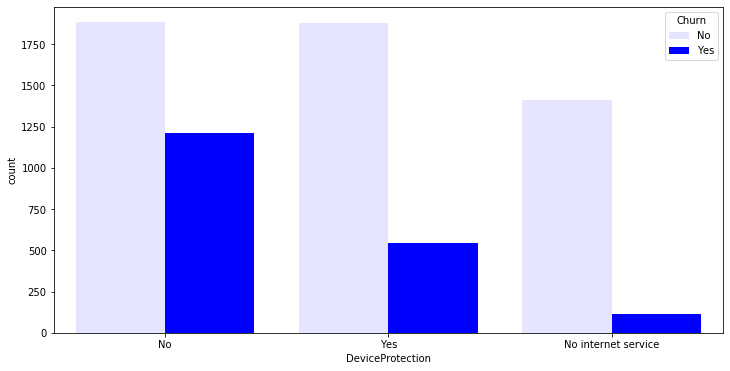

In [33]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'DeviceProtection' , hue = 'Churn' , data = df , dodge = True , color = 'Blue' , saturation = 1)

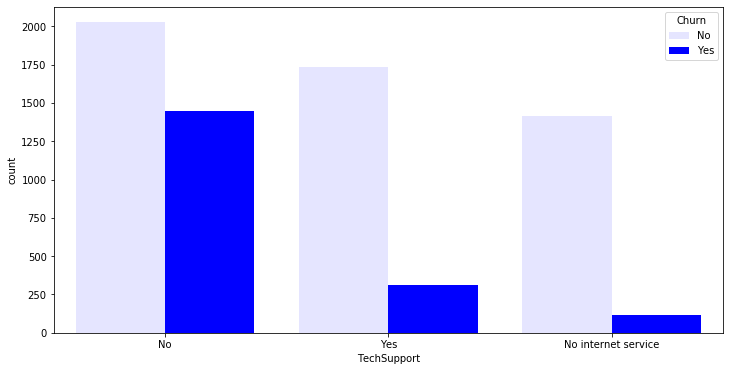

In [34]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'TechSupport' , hue = 'Churn' , data = df , dodge = True , color = 'Blue' , saturation = 1)

Customers with no TechSupport are most likely to migrate to another service provider.



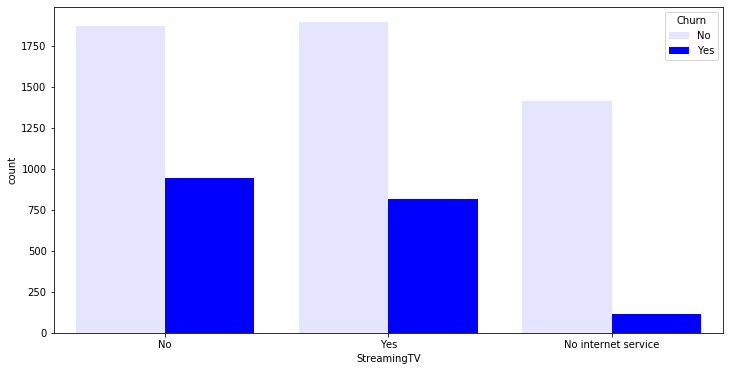

In [35]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'StreamingTV' , hue = 'Churn' , data = df , dodge = True , color = 'Blue' , saturation = 1)

According to above Highest churn are not streaming TV.



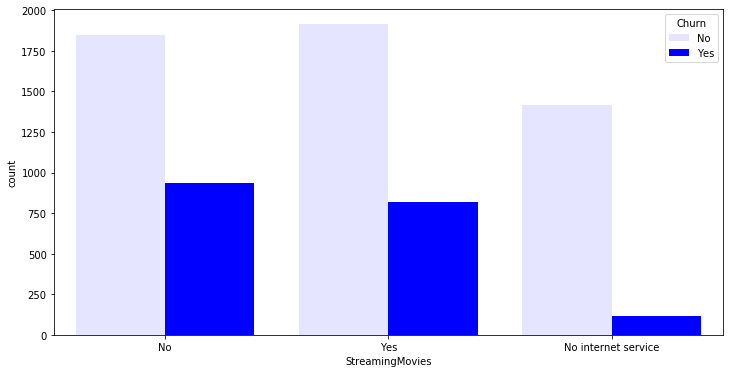

In [36]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'StreamingMovies' , hue = 'Churn' , data = df , dodge = True , color = 'Blue' , saturation = 1)

According to above Highest churn are not streaming Movies.



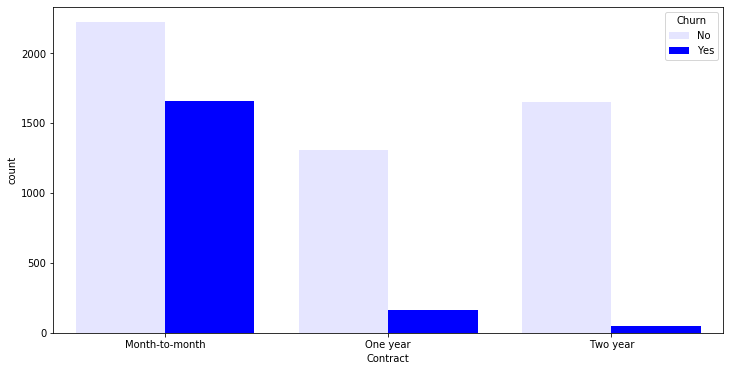

In [37]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'Contract' , hue = 'Churn' , data = df , dodge = True , color = 'Blue' , saturation = 1)

Highest churn have month_to_month contract.



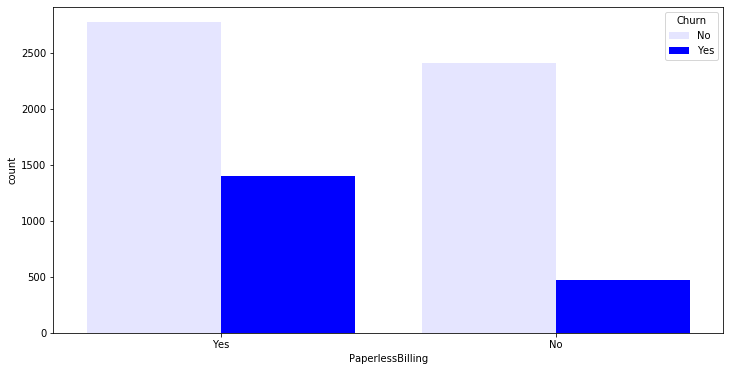

In [38]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'PaperlessBilling' , hue = 'Churn' , data = df , dodge = True , color = 'Blue' , saturation = 1)

Customers with Paperless Billing are most likely to churn.



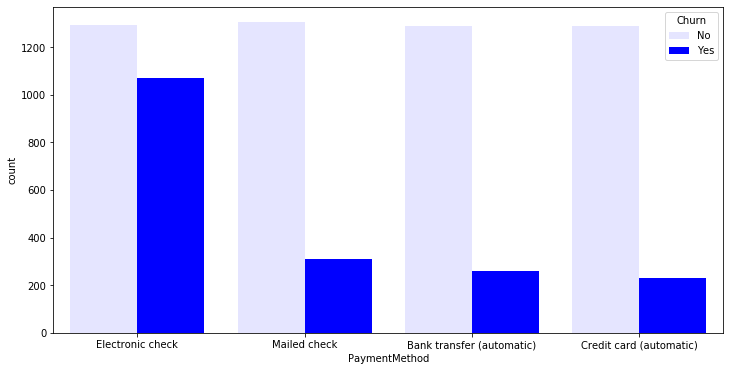

In [39]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'PaymentMethod' , hue = 'Churn' , data = df , dodge = True , color = 'Blue' , saturation = 1)

Electronic Check is the highest to churn.



In [40]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [41]:
#replacing target variable into 0 and 1
df['Churn'] = df['Churn'].str.replace('No', '0')
df['Churn'] = df['Churn'].str.replace('Yes', '1')
df['Churn'] = df['Churn'].astype(np.int64)

# Data Encoding

In [42]:
from sklearn.preprocessing import LabelEncoder
encoded = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',]

encoders = {column: LabelEncoder() for column in encoded}

for column in encoded:
    df[column] = encoders[column].fit_transform(df[column])

In [43]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.5,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


# Removing Missing or NaN values.

In [44]:
df.dtypes

gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges         object
Churn                 int64
dtype: object

In [45]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [46]:
df[np.isnan(df['TotalCharges'])]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,0,0,1,1,0,0,1,0,2,0,2,2,2,0,2,1,0,52.55,NaN,0
753,1,0,0,1,0,1,0,2,1,1,1,1,1,1,2,0,3,20.25,NaN,0
936,0,0,1,1,0,1,0,0,2,2,2,0,2,2,2,0,3,80.85,NaN,0
1082,1,0,1,1,0,1,2,2,1,1,1,1,1,1,2,0,3,25.75,NaN,0
1340,0,0,1,1,0,0,1,0,2,2,2,2,2,0,2,0,1,56.05,NaN,0
3331,1,0,1,1,0,1,0,2,1,1,1,1,1,1,2,0,3,19.85,NaN,0
3826,1,0,1,1,0,1,2,2,1,1,1,1,1,1,2,0,3,25.35,NaN,0
4380,0,0,1,1,0,1,0,2,1,1,1,1,1,1,2,0,3,20.00,NaN,0
5218,1,0,1,1,0,1,0,2,1,1,1,1,1,1,1,1,3,19.70,NaN,0
6670,0,0,1,1,0,1,2,0,0,2,2,2,2,0,2,0,3,73.35,NaN,0


In [47]:
df.dtypes

gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [48]:
df['TotalCharges'].unique()

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [49]:
df.fillna(df["TotalCharges"].mean())

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


In [50]:
df['Churn'] = pd.to_numeric(df.Churn, errors='coerce')
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [51]:
df[np.isnan(df['Churn'])]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [52]:
df['Churn'].unique()

array([0, 1], dtype=int64)

In [53]:
df = df.fillna(df['Churn'].value_counts().index[0])

In [54]:
df.dtypes

gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

# Checking Outliers

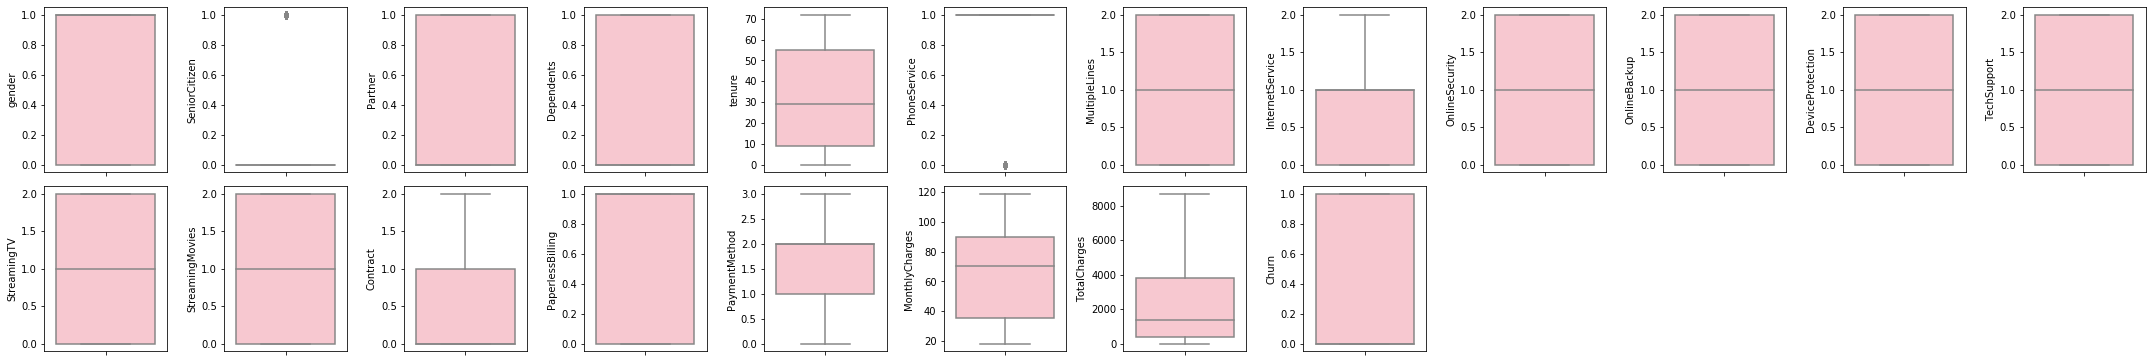

In [55]:
collist=df.columns.values
ncol=12
nrows=10
plt.figure(figsize=(30,25))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='Pink', orient='v')
    plt.tight_layout()

# Spliting the Independent and Target Variables.

In [56]:
x=df.drop('Churn',axis=1)
y=df['Churn']

# Data Scaling

In [57]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
X=sc.fit_transform(x)
X=pd.DataFrame(X,columns=x.columns)
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0.0,0.0,1.0,0.0,0.013889,0.0,0.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.115423,0.003437
1,1.0,0.0,0.0,0.0,0.472222,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.5,0.0,1.000000,0.385075,0.217564
2,1.0,0.0,0.0,0.0,0.027778,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,0.354229,0.012453
3,1.0,0.0,0.0,0.0,0.625000,0.0,0.5,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.5,0.0,0.000000,0.239303,0.211951
4,0.0,0.0,0.0,0.0,0.027778,1.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.521891,0.017462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0.0,1.0,1.0,0.333333,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.5,1.0,1.000000,0.662189,0.229194
7039,0.0,0.0,1.0,1.0,1.000000,1.0,1.0,0.5,0.0,1.0,1.0,0.0,1.0,1.0,0.5,1.0,0.333333,0.845274,0.847792
7040,0.0,0.0,1.0,1.0,0.152778,0.0,0.5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.112935,0.039892
7041,1.0,1.0,1.0,0.0,0.055556,1.0,1.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,0.558706,0.035303


In [58]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

# Data Imbalance

Text(0.5, 1.0, 'Target Variable')

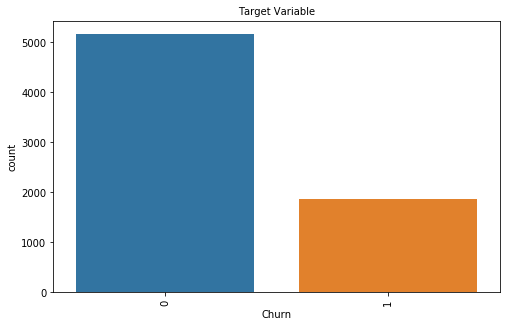

In [59]:
fig_size = (8,5)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=df, x="Churn")
plt.xticks(rotation=90)
plt.title("Target Variable", fontsize = 10)

In [60]:
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x_over, y_over=SM.fit_resample(X,y)

In [61]:
y_over=pd.DataFrame(y_over)

In [62]:
X=x_over
y=y_over

In [63]:
print(X.shape,y.shape)

(10348, 19) (10348, 1)


# Finding best Random State for train test split.

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

max_accuracy = 0
best_rs = 0
for i in range(1, 150):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = i)
    lg = LogisticRegression()
    lg.fit(X_train, y_train)
    pred = lg.predict(X_test)
    acc = accuracy_score(y_test, pred)
    if acc > max_accuracy:
        max_accuracy = acc
        best_rs = i
print(f"Best Random State is {best_rs}, {max_accuracy*100}")

Best Random State is 100, 79.5169082125604


In [65]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=132)

# Importing Algorithms

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

# LogisticRegression

In [67]:
lg = LogisticRegression()
lg.fit(X_train, y_train)
pred_lg = lg.predict(X_test)
print(accuracy_score(y_test,pred_lg))
print(confusion_matrix(y_test,pred_lg))
print(classification_report(y_test,pred_lg))

0.7874396135265701
[[1175  376]
 [ 284 1270]]
              precision    recall  f1-score   support

           0       0.81      0.76      0.78      1551
           1       0.77      0.82      0.79      1554

    accuracy                           0.79      3105
   macro avg       0.79      0.79      0.79      3105
weighted avg       0.79      0.79      0.79      3105



# RandomForestClassifier

In [68]:
rf=RandomForestClassifier(n_estimators=100,random_state=49)
rf.fit(X_train,y_train)
predrf=rf.predict(X_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.8579710144927536
[[1329  222]
 [ 219 1335]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1551
           1       0.86      0.86      0.86      1554

    accuracy                           0.86      3105
   macro avg       0.86      0.86      0.86      3105
weighted avg       0.86      0.86      0.86      3105



# DecisionTreeClassifier

In [69]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion='entropy',splitter='best', max_depth=None)
dtc.fit(X_train,y_train)
preddtc=dtc.predict(X_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.784219001610306
[[1230  321]
 [ 349 1205]]
              precision    recall  f1-score   support

           0       0.78      0.79      0.79      1551
           1       0.79      0.78      0.78      1554

    accuracy                           0.78      3105
   macro avg       0.78      0.78      0.78      3105
weighted avg       0.78      0.78      0.78      3105



# AdaBoostClassifier

In [70]:
ad=AdaBoostClassifier()
ad.fit(X_train,y_train) 
predad=ad.predict(X_test)
print(accuracy_score(y_test,predad))
print(confusion_matrix(y_test,predad))
print(classification_report(y_test,predad))

0.8251207729468599
[[1235  316]
 [ 227 1327]]
              precision    recall  f1-score   support

           0       0.84      0.80      0.82      1551
           1       0.81      0.85      0.83      1554

    accuracy                           0.83      3105
   macro avg       0.83      0.83      0.82      3105
weighted avg       0.83      0.83      0.82      3105



# MultinomialNB

In [71]:
mnb=MultinomialNB()
mnb.fit(X_train,y_train) 
pred_mnb=mnb.predict(X_test)
print(accuracy_score(y_test,pred_mnb))
print(confusion_matrix(y_test,pred_mnb))
print(classification_report(y_test,pred_mnb))

0.7565217391304347
[[1141  410]
 [ 346 1208]]
              precision    recall  f1-score   support

           0       0.77      0.74      0.75      1551
           1       0.75      0.78      0.76      1554

    accuracy                           0.76      3105
   macro avg       0.76      0.76      0.76      3105
weighted avg       0.76      0.76      0.76      3105



# KNeighborsClassifier

In [72]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
predknn=knn.predict(X_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.7819645732689211
[[1048  503]
 [ 174 1380]]
              precision    recall  f1-score   support

           0       0.86      0.68      0.76      1551
           1       0.73      0.89      0.80      1554

    accuracy                           0.78      3105
   macro avg       0.80      0.78      0.78      3105
weighted avg       0.80      0.78      0.78      3105



# Spport Vector Classifier

In [73]:
svc=SVC()
svc.fit(X_train,y_train) 
pred_svc=svc.predict(X_test)
print(accuracy_score(y_test,pred_svc))
print(confusion_matrix(y_test,pred_svc))
print(classification_report(y_test,pred_svc))

0.8067632850241546
[[1219  332]
 [ 268 1286]]
              precision    recall  f1-score   support

           0       0.82      0.79      0.80      1551
           1       0.79      0.83      0.81      1554

    accuracy                           0.81      3105
   macro avg       0.81      0.81      0.81      3105
weighted avg       0.81      0.81      0.81      3105



# Cross Validation

As we know the Random Forest Classifier is given hight score but we are Cross validating the models to see thre are underfitting or overfitting present or not.



In [74]:
from sklearn.model_selection import cross_val_score

lg_scores = cross_val_score(lg, X, y, cv = 5)
print(lg_scores)
print(f"Mean of accuracy scores is for Logistic Regression is {lg_scores.mean()*100}\n")

rf_scores = cross_val_score(rf, X, y, cv = 5)
print(rf_scores)
print(f"Mean of accuracy scores is for Random Forest Classifier is {rf_scores.mean()*100}\n")

dtc_scores = cross_val_score(dtc, X, y, cv = 5)
print(dtc_scores)
print(f"Mean of accuracy scores is for Decision Tree Classifier is {dtc_scores.mean()*100}\n")

ad_scores = cross_val_score(ad, X, y, cv = 5)
print(ad_scores)
print(f"Mean of accuracy scores is for ADA Boost Classifier is {ad_scores.mean()*100}\n")

mnb_scores = cross_val_score(mnb, X, y, cv = 5)
print(mnb_scores)
print(f"Mean of accuracy scores is for MultinomialNB is {mnb_scores.mean()*100}\n")

knn_scores = cross_val_score(knn, X, y, cv = 5)
print(knn_scores)
print(f"Mean of accuracy scores is for KNN Classifier is {knn_scores.mean()*100}\n")

svc_scores = cross_val_score(svc, X, y, cv = 5)
print(svc_scores)
print(f"Mean of accuracy scores is for SVC Classifier is {svc_scores.mean()*100}\n")

[0.77004831 0.76376812 0.77149758 0.77573707 0.80038666]
Mean of accuracy scores is for Logistic Regression is 77.62875481865963

[0.77681159 0.79275362 0.88743961 0.89173514 0.90043499]
Mean of accuracy scores is for Random Forest Classifier is 84.98349922831399

[0.71207729 0.73236715 0.82270531 0.81971967 0.84678589]
Mean of accuracy scores is for Decision Tree Classifier is 78.67310633389606

[0.77004831 0.77971014 0.82705314 0.84630256 0.84968584]
Mean of accuracy scores is for ADA Boost Classifier is 81.45599988792456

[0.75555556 0.74637681 0.74782609 0.76848719 0.77332044]
Mean of accuracy scores is for MultinomialNB is 75.83132181291342

[0.75990338 0.77536232 0.7821256  0.79023683 0.80425326]
Mean of accuracy scores is for KNN Classifier is 78.23762792359258

[0.77584541 0.77149758 0.80917874 0.82116965 0.83760271]
Mean of accuracy scores is for SVC Classifier is 80.30588185849076



# Hyper parameter tuning

In [75]:
from sklearn.model_selection import GridSearchCV

In [76]:
rf = RandomForestClassifier()
grid_parameters = dict()
grid_parameters['criterion'] = ['gini', 'entropy']
grid_parameters['n_estimators'] = [1, 2, 4, 8, 10, 16, 32, 64, 100, 200]
grid_parameters['min_samples_split'] = [1,2,5,8,10,15,20,25,50,55,60,80,100]
grid_sr = GridSearchCV(estimator=rf,param_grid=grid_parameters,scoring='accuracy', cv=5)
grid_sr.fit(X_train, y_train)
best_parameters=grid_sr.best_params_
best_result=grid_sr.best_score_
best_model = grid_sr.best_estimator_
print(best_parameters)
print(best_result)
print(best_model)

{'criterion': 'gini', 'min_samples_split': 2, 'n_estimators': 200}
0.8408142022122324
RandomForestClassifier(n_estimators=200)


In [77]:
RF = RandomForestClassifier(criterion = 'entropy', min_samples_split = 5, n_estimators = 100)
RF.fit(X_train, y_train)
print(RF.score(X_train, y_train))
pred_rf = RF.predict(X_test)

0.9808090570205716


# Model Evaluation

# Metrics

In [78]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

In [79]:
#Import ROC_AUC_SCORE.
from sklearn.metrics import roc_auc_score

In [80]:
y_pred_prob=RF.predict_proba(X_test)[:,1]
y_pred_prob

array([0.94130952, 0.686     , 0.39258333, ..., 0.1765119 , 0.86961905,
       1.        ])

In [81]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [82]:
fpr

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 6.44745326e-04, 6.44745326e-04, 6.44745326e-04,
       6.44745326e-04, 6.44745326e-04, 6.44745326e-04, 6.44745326e-04,
       6.44745326e-04, 6.44745326e-04, 1.28949065e-03, 1.28949065e-03,
       1.28949065e-03, 1.28949065e-03, 1.93423598e-03, 1.93423598e-03,
       1.93423598e-03, 1.93423598e-03, 1.93423598e-03, 1.93423598e-03,
       1.93423598e-03, 1.93423598e-03, 1.93423598e-03, 1.93423598e-03,
       1.93423598e-03, 1.93423598e-03, 2.57898130e-03, 2.57898130e-03,
       2.57898130e-03, 2.57898130e-03, 3.22372663e-03, 3.22372663e-03,
       3.22372663e-03, 3.22372663e-03, 3.86847195e-03, 3.86847195e-03,
       3.86847195e-03, 3.86847195e-03, 3.86847195e-03, 3.86847195e-03,
      

In [83]:
tpr

array([0.        , 0.02252252, 0.02509653, 0.02638353, 0.02895753,
       0.03217503, 0.03925354, 0.04247104, 0.04633205, 0.04826255,
       0.05534106, 0.05662806, 0.05727156, 0.05855856, 0.06499356,
       0.06756757, 0.07014157, 0.07014157, 0.07142857, 0.07207207,
       0.07335907, 0.07657658, 0.07850708, 0.07915058, 0.08043758,
       0.09266409, 0.09266409, 0.09330759, 0.0952381 , 0.0984556 ,
       0.0984556 , 0.1003861 , 0.1016731 , 0.1023166 , 0.1036036 ,
       0.1042471 , 0.10553411, 0.11711712, 0.11969112, 0.12870013,
       0.12998713, 0.13127413, 0.13127413, 0.13191763, 0.13320463,
       0.13577864, 0.13642214, 0.17052767, 0.17181467, 0.17824968,
       0.17824968, 0.17889318, 0.18018018, 0.19176319, 0.19305019,
       0.1956242 , 0.1956242 , 0.20527671, 0.20656371, 0.20785071,
       0.21042471, 0.21814672, 0.21943372, 0.22072072, 0.22136422,
       0.22393822, 0.22522523, 0.22651223, 0.22715573, 0.22715573,
       0.23294723, 0.23359073, 0.23487773, 0.23487773, 0.23552

In [84]:
thresholds

array([2.00000000e+00, 1.00000000e+00, 9.98000000e-01, 9.96666667e-01,
       9.96000000e-01, 9.95000000e-01, 9.90833333e-01, 9.90000000e-01,
       9.86944444e-01, 9.86904762e-01, 9.84809524e-01, 9.84571429e-01,
       9.84166667e-01, 9.83500000e-01, 9.80777778e-01, 9.80000000e-01,
       9.79404762e-01, 9.79333333e-01, 9.79166667e-01, 9.79130952e-01,
       9.78666667e-01, 9.78000000e-01, 9.77500000e-01, 9.77404762e-01,
       9.77071429e-01, 9.72861111e-01, 9.72857143e-01, 9.72666667e-01,
       9.72500000e-01, 9.71738095e-01, 9.71666667e-01, 9.70309524e-01,
       9.70000000e-01, 9.69583333e-01, 9.69500000e-01, 9.69166667e-01,
       9.69107143e-01, 9.62916667e-01, 9.62500000e-01, 9.60333333e-01,
       9.60000000e-01, 9.59750000e-01, 9.59714286e-01, 9.59142857e-01,
       9.58333333e-01, 9.56833333e-01, 9.56666667e-01, 9.45071429e-01,
       9.45000000e-01, 9.41511905e-01, 9.41500000e-01, 9.41476190e-01,
       9.41380952e-01, 9.38111111e-01, 9.38000000e-01, 9.36317460e-01,
      

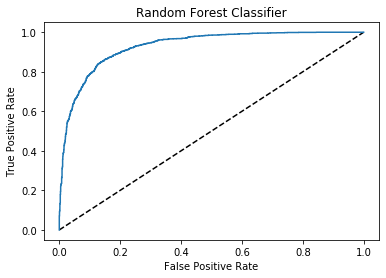

In [85]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Random Forest Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Classifier')
plt.show()

In [86]:
auc_score=roc_auc_score(y_test,RF.predict(X_test))
print(auc_score)

0.8560344677365953


In [87]:
from sklearn import metrics

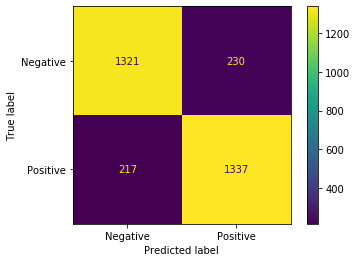

In [88]:
metrics.plot_confusion_matrix(RF, X_test, y_test, display_labels=['Negative', 'Positive'])

# Saving Model

In [89]:
import joblib
joblib.dump(RF,'Customer_Churn_Prediction.obj')

['Customer_Churn_Prediction.obj']